##Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

##Data Preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/Home Credit Indonesia x Rakamin Academy/application_train.csv"

data_train = pd.read_csv(path)

In [65]:
data_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##Assessing Dataset

In [66]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [67]:
#shape of dataset

data_train.shape

(307511, 122)

In [68]:
#types of dataset

data_train.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [69]:
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [70]:
#check duplicate data
duplicate_count = data_train.duplicated().sum()
total_sample_count = len(data_train)

summary_df = pd.DataFrame({
    "Duplicate Count": [duplicate_count],
    "Total Sample Count": [total_sample_count]
})

print(summary_df)

   Duplicate Count  Total Sample Count
0                0              307511


In [71]:
#check missing value
missing_values = data_train.isnull().sum()
missing_percentage = (missing_values / len(data_train)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

# Tampilkan hanya kolom yang memiliki missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 50]
print(missing_summary)


                            Missing Count  Missing Percentage (%)
AMT_GOODS_PRICE                       278                0.090403
NAME_TYPE_SUITE                      1292                0.420148
OWN_CAR_AGE                        202929               65.990810
OCCUPATION_TYPE                     96391               31.345545
EXT_SOURCE_1                       173378               56.381073
...                                   ...                     ...
AMT_REQ_CREDIT_BUREAU_DAY           41519               13.501631
AMT_REQ_CREDIT_BUREAU_WEEK          41519               13.501631
AMT_REQ_CREDIT_BUREAU_MON           41519               13.501631
AMT_REQ_CREDIT_BUREAU_QRT           41519               13.501631
AMT_REQ_CREDIT_BUREAU_YEAR          41519               13.501631

[64 rows x 2 columns]


Insight
pada kolom own_car_age missing value 65%
kolom occupation_type missing value 31%
kolom ext_source_1 missing value 56%
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR masing2 missing value 13,5%


Pertama, kolom dengan missing value ini akan dicari tahu lebih dahulu apa yang menjadikannya missing value



In [72]:
data_train[data_train['OWN_CAR_AGE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
data_train['OWN_CAR_AGE'].value_counts(dropna=False)


,count
OWN_CAR_AGE,
NaN,202929
7.0,7424
6.0,6382
3.0,6370
8.0,5887
...,...
57.0,1
69.0,1
50.0,1


missing value pada kolom own car age adalah NaN memiliki jumlah 202929. jumlah ini terlalu besar sehingga dapat dihapus saja

In [74]:
data_train[data_train['EXT_SOURCE_1'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
data_train['EXT_SOURCE_1'].value_counts(dropna=False)

,count
EXT_SOURCE_1,
NaN,173378
0.581015,5
0.546426,5
0.443982,5
0.765724,5
...,...
0.658473,1
0.318295,1
0.834644,1


###Handling Missing Values

In [76]:

# Tampilkan hanya kolom yang memiliki missing percentage > 50%
columns_to_drop = missing_summary[missing_summary['Missing Percentage (%)'] > 50].index
print("Kolom yang akan dihapus:", columns_to_drop.tolist())



Kolom yang akan dihapus: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [77]:
# Hapus kolom dari data_train
data_train = data_train.drop(columns=columns_to_drop)

# Tampilkan informasi dataset setelah penghapusan
print("Shape dataset setelah penghapusan:", data_train.shape)

Shape dataset setelah penghapusan: (307511, 81)


In [78]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [79]:
print(data_train['OCCUPATION_TYPE'].value_counts(dropna=False))


modus_value = data_train['OCCUPATION_TYPE'].mode()[0]
print("Modus dari OCCUPATION_TYPE:", modus_value)

OCCUPATION_TYPE
NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64
Modus dari OCCUPATION_TYPE: Laborers


In [80]:
# Imputasi nilai NaN dengan modus
data_train['OCCUPATION_TYPE'] = data_train['OCCUPATION_TYPE'].fillna(modus_value)
print(data_train['OCCUPATION_TYPE'].isnull().sum())

0


In [81]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [82]:
data_train['NAME_FAMILY_STATUS'].value_counts(dropna=False)

,count
NAME_FAMILY_STATUS,
Married,196432
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088
Unknown,2


In [83]:
data_train['CODE_GENDER'].value_counts(dropna=False)

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


In [84]:
# replace 'unknown' values in 'NAME_FAMILY_STATUS' columns with 'married'
# replace 'XNA' values in 'CODE_GENDER' columns with 'female'
data_train['CODE_GENDER']= data_train['CODE_GENDER'].replace('XNA', 'F')
data_train['NAME_FAMILY_STATUS']= data_train['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')

#Exploratory Data Analysis

In [85]:
#membuat kolom baru AGE untuk mengelompokkan usia consumers

# calc of the day (make abs)
data_train['DAYS_BIRTH']= data_train['DAYS_BIRTH'].abs()
data_train['DAYS_EMPLOYED']= data_train['DAYS_EMPLOYED'].abs()
data_train['DAYS_REGISTRATION']= data_train['DAYS_REGISTRATION'].abs()
data_train['DAYS_ID_PUBLISH']= data_train['DAYS_ID_PUBLISH'].abs()
data_train['DAYS_LAST_PHONE_CHANGE']= data_train['DAYS_LAST_PHONE_CHANGE'].abs()

# create new column to calc consumers age
data_train['AGE']= (data_train['DAYS_BIRTH']/365).astype(int)

age_category= []
for i in data_train['AGE']:
    if i <=35:
        age_category.append('Early Adult')
    elif i <=45:
        age_category.append('Adult')
    else:
        age_category.append('Older')

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kolom AGE_CATEGORY berdasarkan kelompok usia
data_train['AGE_CATEGORY'] = data_train['AGE'].apply(lambda x: 'Early Adult' if x <= 35
                                                     else 'Adult' if x <= 45
                                                     else 'Older')


<ipython-input-87-80b58affdc92>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")


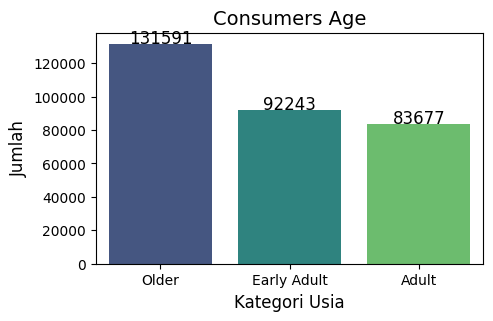

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah masing-masing kategori umur
age_counts = data_train['AGE_CATEGORY'].value_counts(dropna=False)

# Buat bar chart
plt.figure(figsize=(5, 3))
sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")

# Tambahkan label dan judul
plt.xlabel("Kategori Usia", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.title("Consumers Age", fontsize=14)
plt.xticks(rotation=0)  # Pastikan label sumbu X terbaca dengan jelas

# Tampilkan angka di atas setiap bar
for i, v in enumerate(age_counts.values):
    plt.text(i, v + 5, str(v), ha="center", fontsize=12)

# Tampilkan plot
plt.show()


<ipython-input-88-91814d2ed1b6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
<ipython-input-88-91814d2ed1b6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
<ipython-input-88-91814d2ed1b6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
<ipytho

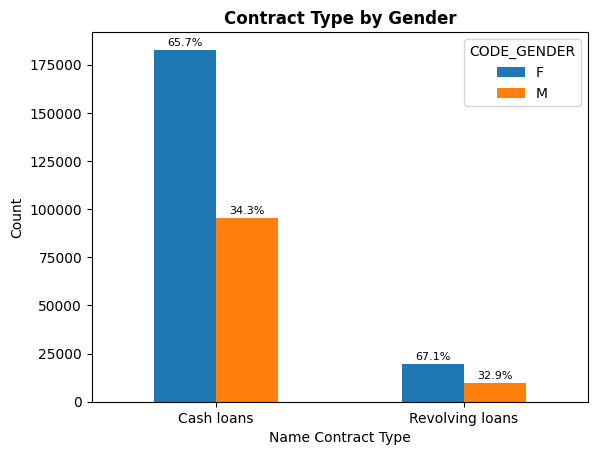

In [88]:
#menampilkan contract type berdasarkan gender consumers

contract_gender= data_train.groupby(['NAME_CONTRACT_TYPE', 'CODE_GENDER']).size().unstack()
axis= contract_gender.plot(kind='bar') #unstack the category

axis.set_xticklabels(axis.get_xticklabels(), rotation=0)

# add percentage
for i, p in enumerate(axis.patches):
    total= contract_gender.sum(axis=1)
    axis.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                  textcoords='offset points')

plt.xlabel('Name Contract Type')
plt.ylabel('Count')
plt.title('Contract Type by Gender', weight= 'bold')
plt.show()

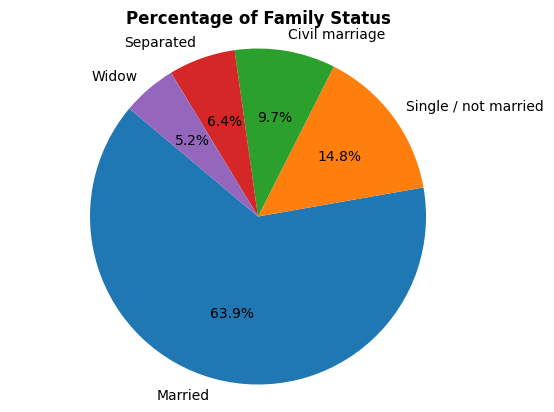

In [89]:
# pie chart name_family status
fam_stat= data_train['NAME_FAMILY_STATUS'].value_counts()

plt.pie(fam_stat, labels= fam_stat.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Family Status', weight= 'bold')
plt.axis('equal')
plt.show()

In [90]:
# create new column to replace values using text description
status= {0: 'No Payment Difficulties', 1:'Payment Difficulties'}
data_train['TARGET_DESC']= data_train['TARGET'].replace(status)

<ipython-input-91-aa29b400c3ca>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis.text(i, count+0.1, f'{percentages[i]:.1f}%', ha='center')


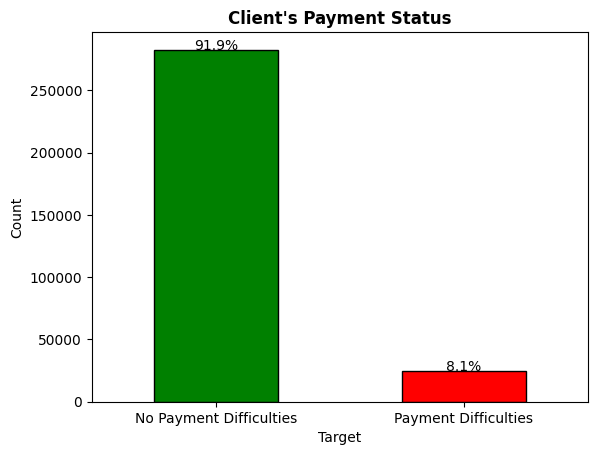

In [91]:
# barchart target
axis= data_train['TARGET_DESC'].value_counts().plot(kind='bar', color=['green','red'], edgecolor='black')

# percentages of each category
percentages= data_train['TARGET_DESC'].value_counts(normalize=True)*100

for i, count in enumerate (data_train['TARGET_DESC'].value_counts()):
    axis.text(i, count+0.1, f'{percentages[i]:.1f}%', ha='center')

plt.xlabel('Target')
plt.ylabel('Count')
plt.title("Client's Payment Status", weight= 'bold')
plt.xticks(rotation=0)
plt.show()

<ipython-input-92-26f7a6720f7a>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
<ipython-input-92-26f7a6720f7a>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
<ipython-input-92-26f7a6720f7a>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
<ipy

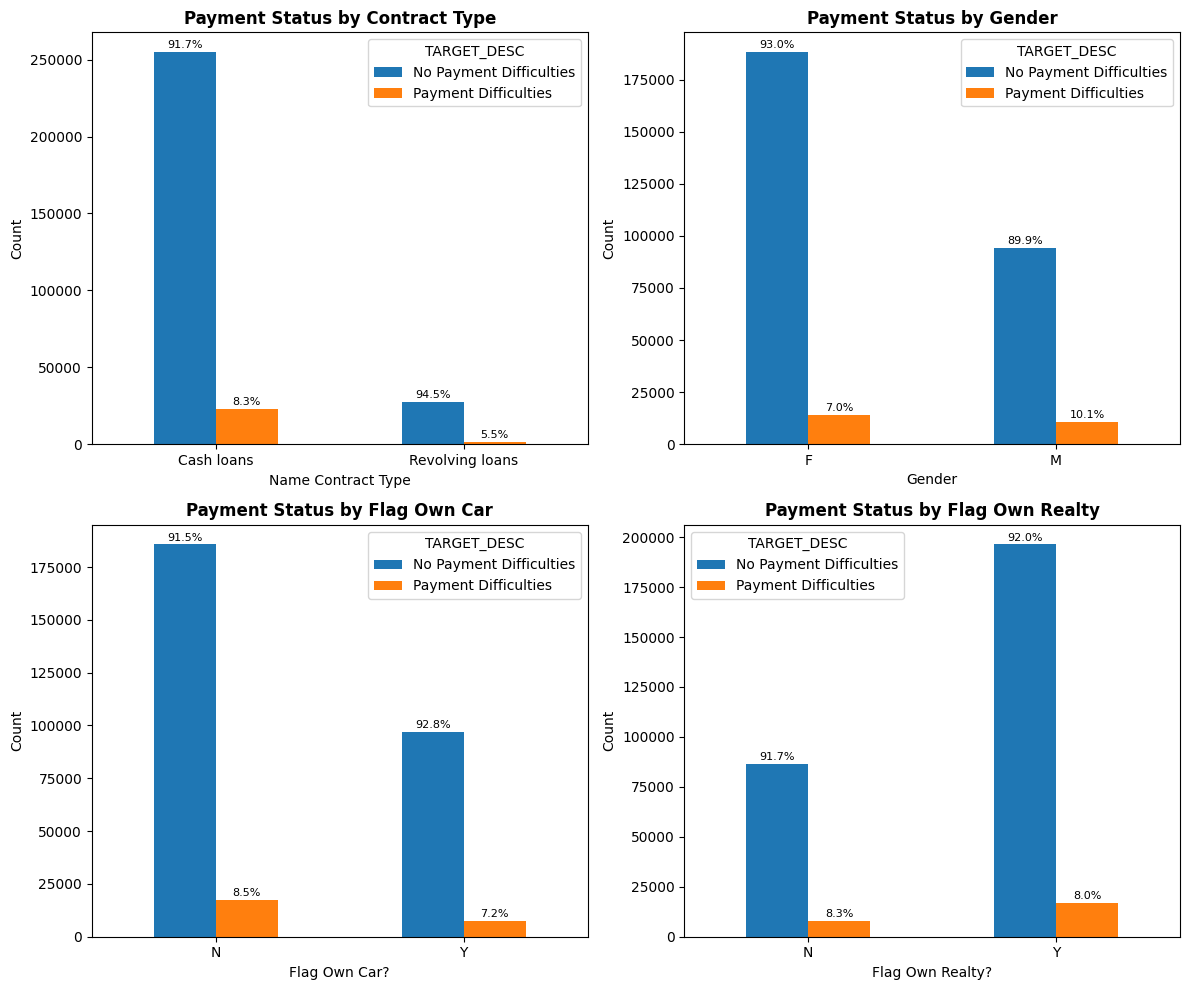

In [92]:
# compare TARGET with other categories (1)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Barchart target & contract_type
target_contract = data_train.groupby(['NAME_CONTRACT_TYPE', 'TARGET_DESC']).size().unstack()
axis1 = target_contract.plot(kind='bar', ax=axes[0, 0])  # Unstack the category
axis1.set_xticklabels(axis1.get_xticklabels(), rotation=0)
axis1.set_xlabel('Name Contract Type')
axis1.set_ylabel('Count')
axis1.set_title('Payment Status by Contract Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis1.patches):
    total = target_contract.sum(axis=1)
    axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#========================================================================================
# Barchart target & code_gender
target_gender = data_train.groupby(['CODE_GENDER', 'TARGET_DESC']).size().unstack()
axis2 = target_gender.plot(kind='bar', ax=axes[0, 1])  # Unstack the category
axis2.set_xticklabels(axis2.get_xticklabels(), rotation=0)
axis2.set_xlabel('Gender')
axis2.set_ylabel('Count')
axis2.set_title('Payment Status by Gender', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis2.patches):
    total = target_gender.sum(axis=1)
    axis2.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#========================================================================================
# Barchart target & flag_own_car
target_flag_car = data_train.groupby(['FLAG_OWN_CAR', 'TARGET_DESC']).size().unstack()
axis3 = target_flag_car.plot(kind='bar', ax=axes[1, 0])  # Unstack the category
axis3.set_xticklabels(axis3.get_xticklabels(), rotation=0)
axis3.set_xlabel('Flag Own Car?')
axis3.set_ylabel('Count')
axis3.set_title('Payment Status by Flag Own Car', weight='bold')

# add percentage labels
for i, p in enumerate(axis3.patches):
    total = target_flag_car.sum(axis=1)
    axis3.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#========================================================================================
# Barchart target & flag_own_realty
target_flag_realty = data_train.groupby(['FLAG_OWN_REALTY', 'TARGET_DESC']).size().unstack()
axis4 = target_flag_realty.plot(kind='bar', ax=axes[1, 1])  # Unstack the category
axis4.set_xticklabels(axis4.get_xticklabels(), rotation=0)
axis4.set_xlabel('Flag Own Realty?')
axis4.set_ylabel('Count')
axis4.set_title('Payment Status by Flag Own Realty', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis4.patches):
    total = target_flag_realty.sum(axis=1)
    axis4.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
plt.tight_layout()
plt.show()

<ipython-input-93-a542f4b0f69a>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
<ipython-input-93-a542f4b0f69a>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
<ipython-input-93-a542f4b0f69a>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
<ipy

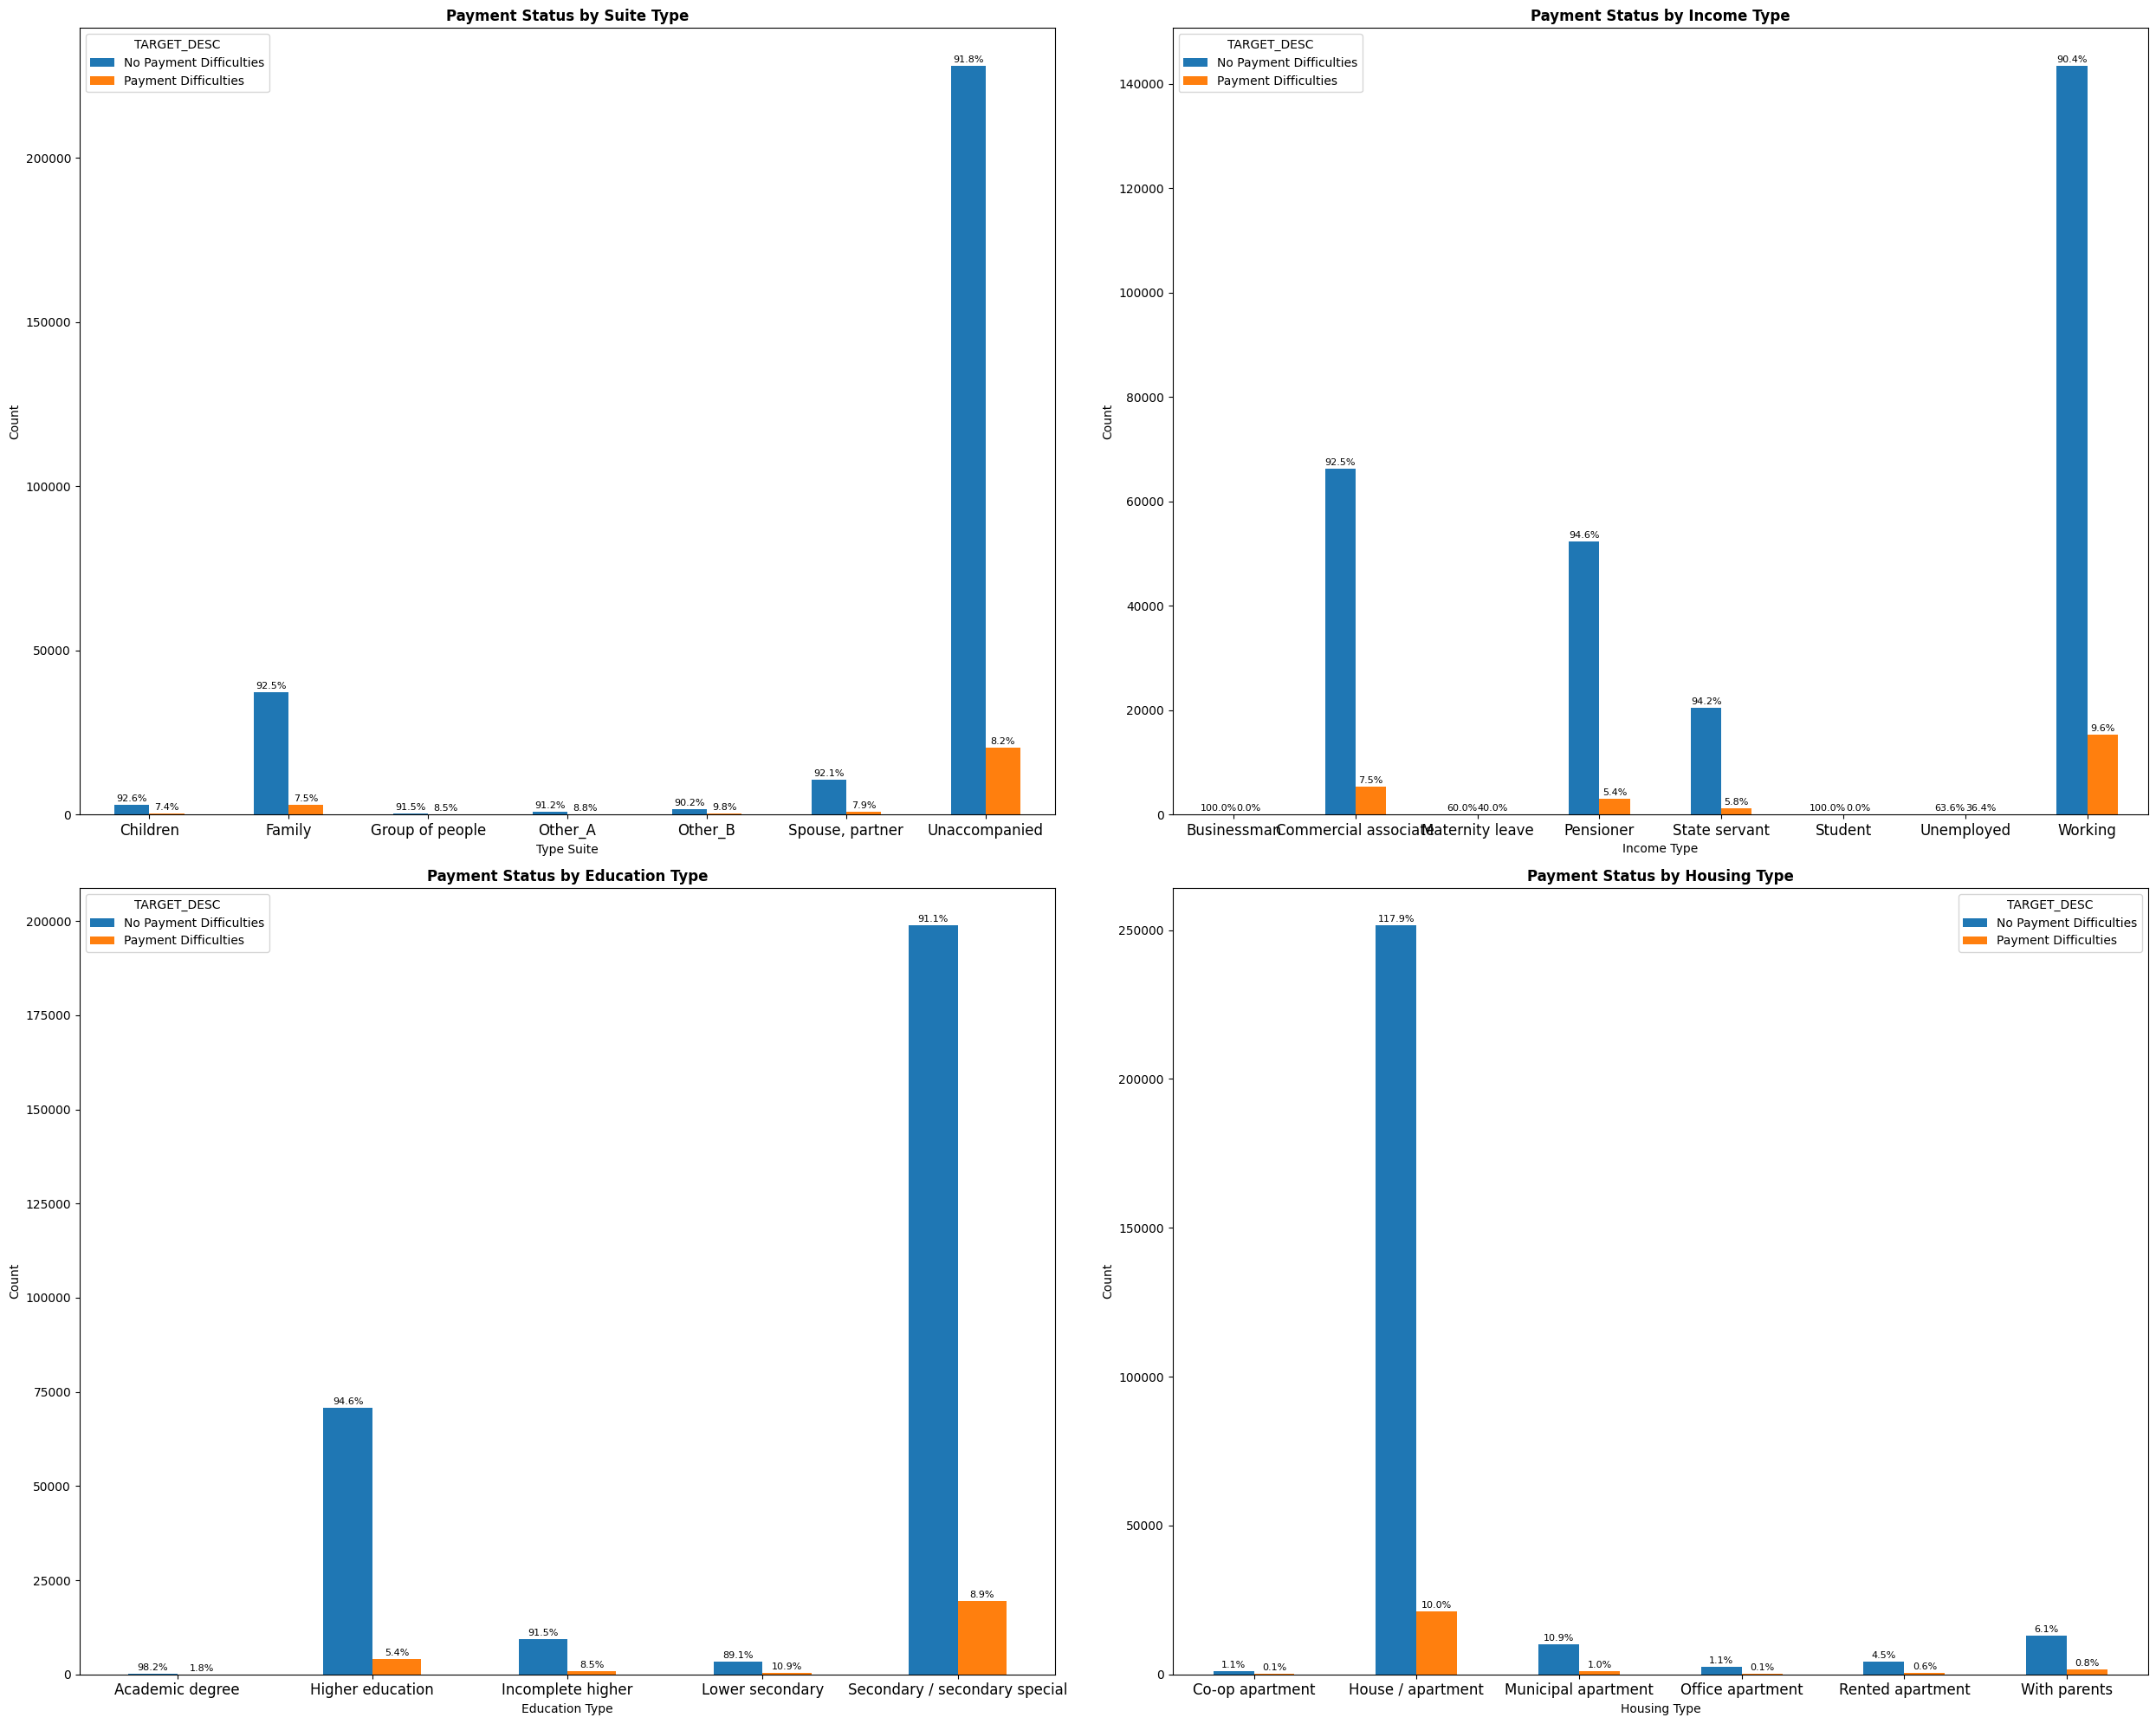

In [93]:
# compare TARGET with other categories (2)

fig, axes = plt.subplots(2, 2, figsize=(25, 20))

# Barchart target & name_type_suite
target_suite = data_train.groupby(['NAME_TYPE_SUITE', 'TARGET_DESC']).size().unstack()
axis1 = target_suite.plot(kind='bar', ax=axes[0, 0])  # Unstack the category
axis1.set_xticklabels(axis1.get_xticklabels(), rotation=0, fontsize=12)
axis1.set_xlabel('Type Suite')
axis1.set_ylabel('Count')
axis1.set_title('Payment Status by Suite Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis1.patches):
    total = target_suite.sum(axis=1)
    axis1.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#========================================================================================
# Barchart target & name_income_type
target_income = data_train.groupby(['NAME_INCOME_TYPE', 'TARGET_DESC']).size().unstack()
axis2 = target_income.plot(kind='bar', ax=axes[0, 1])  # Unstack the category
axis2.set_xticklabels(axis2.get_xticklabels(), rotation=0, fontsize= 12)
axis2.set_xlabel('Income Type')
axis2.set_ylabel('Count')
axis2.set_title('Payment Status by Income Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis2.patches):
    total = target_income.sum(axis=1)
    axis2.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#========================================================================================
# Barchart target & name_education_type
target_education = data_train.groupby(['NAME_EDUCATION_TYPE', 'TARGET_DESC']).size().unstack()
axis3 = target_education.plot(kind='bar', ax=axes[1, 0])  # Unstack the category
axis3.set_xticklabels(axis3.get_xticklabels(), rotation=0, fontsize=12)
axis3.set_xlabel('Education Type')
axis3.set_ylabel('Count')
axis3.set_title('Payment Status by Education Type', weight='bold')

# add percentage labels
for i, p in enumerate(axis3.patches):
    total = target_education.sum(axis=1)
    axis3.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

#========================================================================================
# Barchart target & name_housing_type
target_house = data_train.groupby(['NAME_HOUSING_TYPE', 'TARGET_DESC']).size().unstack()
axis4 = target_house.plot(kind='bar', ax=axes[1, 1])  # Unstack the category
axis4.set_xticklabels(axis4.get_xticklabels(), rotation=0, fontsize=12)
axis4.set_xlabel('Housing Type')
axis4.set_ylabel('Count')
axis4.set_title('Payment Status by Housing Type', weight= 'bold')

# add percentage labels
for i, p in enumerate(axis4.patches):
    total = target_flag_realty.sum(axis=1)
    axis4.annotate(f'{p.get_height()/total[i % len(total)]:.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')
plt.tight_layout()
plt.show()

##Business Insight

Business Insights
cash loans = pinjaman tunai , revolving loans= pinjaman bergulir/pinjamam berjangka

1. Persentase clients yang memiliki permasalahan dalam payment problem of loan ada sebanyak 8.1% dari total peminjam atau sekitar 25K (24.908)
2. Jenis contract yang ditawarkan kepada para client terbagi menjadi 2 jenis, yaitu cash loans dan revolving loans dimana pada kedua jenis didominasi oleh client wanita, yaitu sebesar 65,7% pada cash loans dan 67,1% pada revolving loans
3. Clients female dinilai lebih disiplin dalam melunasi pinjaman dari male dengan persentase masalah yang lebih kecil. Clients with payment problem for female is around 7 % sedangkan male 10%.
4. Terdapat sekitar 9% clients yang mengalami kesulitan dalam membayar cash loans dan 6% orang yang kesulitan dalam revolving loans.
Mayoritas clients yang memiliki payment difficulties tidak memiliki rumah dan realty pribadi
5. Berdasarkan type suite kategori clients yang memiliki payment difficulties paling banyak berasal dari kategori 'Unaccompanied' yang diikuti oleh 'Family'
6. Berdasrkan jenis pendidikan tertinggi yang ditempuh oleh clients mayoritas ada pada 'Scondary/secondary special' yaitu sebesar 8,9% sedangkan berdasarkan employee type clients dengan payment difficulties mayoritas berasal dari kelompok 'working' yang diikuti oleh kelompok 'commercial assosiate' dan 'pensioner'
7. Clients dengan 'housing type' = House/Apartment memiliki persentase tertinggi dibandingkan kategori lain yaitu sebesar 10% atau sekitar (31K) clients

#Data Preprocessing

In [94]:
data_train.shape

print(data_train.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
AGE                             int64
AGE_CATEGORY                   object
TARGET_DESC                    object
Length: 84, dtype: object


In [95]:
# numerical column
#imputasi nilai NaN dengan nilai median

num_columns= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'CNT_CHILDREN','CNT_FAM_MEMBERS',
              'EXT_SOURCE_3','EXT_SOURCE_2','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
             'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']
data_train[num_columns]= data_train[num_columns].fillna(value= data_train[num_columns].median())

In [96]:
#list of categorical column

cat= data_train.select_dtypes(exclude= 'number').columns.tolist()
cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'AGE_CATEGORY',
 'TARGET_DESC']

In [97]:
df= data_train.copy()

In [98]:
#ubah categorical column menjadi numeric

df[cat]= df[cat].apply(LabelEncoder().fit_transform)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_CATEGORY,TARGET_DESC
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,52,2,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,52,2,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,54,2,0


In [99]:
#hapus nilai Nan

df= df.dropna()

In [100]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_CATEGORY,TARGET_DESC
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0
12,100016,0,0,0,0,1,0,67500.0,80865.0,5881.5,...,0,0.0,0.0,0.0,1.0,0.0,0.0,36,0,0
13,100017,0,0,1,1,0,1,225000.0,918468.0,28966.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,38,0,0
14,100018,0,0,0,0,1,0,189000.0,773680.5,32778.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,39,0,0


In [101]:
#hapus kolom SK_ID_CURR

df= df.drop('SK_ID_CURR', axis=1)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_CATEGORY,TARGET_DESC
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,1
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,45,0,0
12,0,0,0,0,1,0,67500.0,80865.0,5881.5,67500.0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,36,0,0
13,0,0,1,1,0,1,225000.0,918468.0,28966.5,697500.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,38,0,0
14,0,0,0,0,1,0,189000.0,773680.5,32778.0,679500.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,39,0,0


In [102]:
#pisahkan antara target dan fitur

X = df.drop(['TARGET', 'TARGET_DESC'], axis=1)
y = df['TARGET']

##Feature Selection

In [109]:
# Split data sebelum feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [110]:
# Feature selection hanya dilakukan di training set
features_selected = SelectKBest(score_func=chi2, k=10)
fit = features_selected.fit(X_train, y_train)

df_scores = pd.DataFrame(fit.scores_)
df_pvalues = pd.DataFrame(fit.pvalues_)
df_columns = pd.DataFrame(X_train.columns)

feature_scores = pd.concat([df_columns, df_scores, df_pvalues], axis=1)
feature_scores.columns = ['Features', 'Score', 'P-Value']

In [111]:
# Pilih fitur dengan p-value < 0.05
feature_fix = feature_scores[feature_scores['P-Value'] < 0.05]
features = feature_fix['Features'].to_list()

In [112]:
# Update X_train dan X_test dengan fitur yang telah dipilih
X_train = X_train[features]
X_test = X_test[features]

##Handling Imbalanced Dataset

###Oversampling with SMOTE

In [113]:
# SMOTE hanya dilakukan di training set
smote = SMOTE(sampling_strategy='auto', k_neighbors=10, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [114]:
# Cek distribusi kelas setelah SMOTE
print(y_train_res.value_counts())

TARGET
0    99513
1    99513
Name: count, dtype: int64


#ML Modelling

##Logistic Regression

In [115]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [116]:
#normalisasi dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)  # Fit-transform hanya pada training data
X_test_scaled = scaler.transform(X_test)  # Transform pada test data

In [117]:
#build model

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train_res)

LogisticRegression(max_iter=1000)

In [118]:
y_pred_lr = logreg_model.predict(X_test_scaled)

In [119]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     42649
           1       0.13      0.30      0.18      3199

    accuracy                           0.81     45848
   macro avg       0.54      0.58      0.54     45848
weighted avg       0.89      0.81      0.84     45848



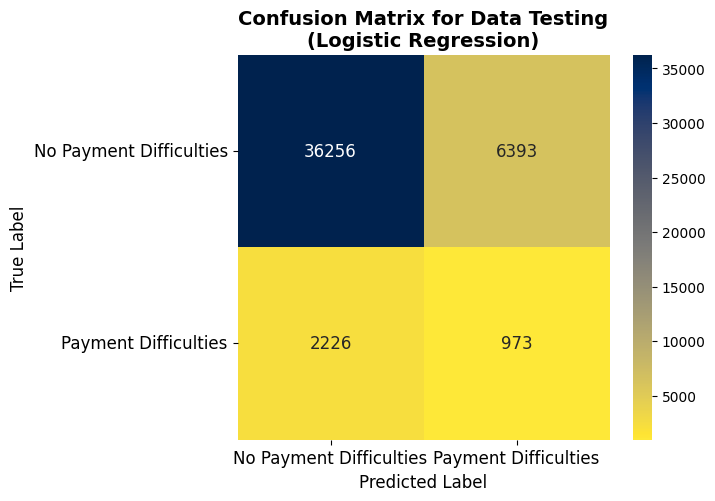

In [120]:
#confusion matrix
confusion_matrix_lr = pd.DataFrame(confusion_matrix(y_test, y_pred_lr),
                                   index=['No Payment Difficulties', 'Payment Difficulties'],
                                   columns=['No Payment Difficulties', 'Payment Difficulties'])

plt.figure(figsize=(6,5))
heatmap = sns.heatmap(confusion_matrix_lr, annot=True, annot_kws={'size': 12}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=12)

plt.title('Confusion Matrix for Data Testing\n(Logistic Regression)', fontsize=14, color='black', weight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

In [121]:
#ROC Score

roc_auc_lr = round(roc_auc_score(y_test, y_pred_lr), 5)
print('ROC AUC:', roc_auc_lr)

ROC AUC: 0.57713


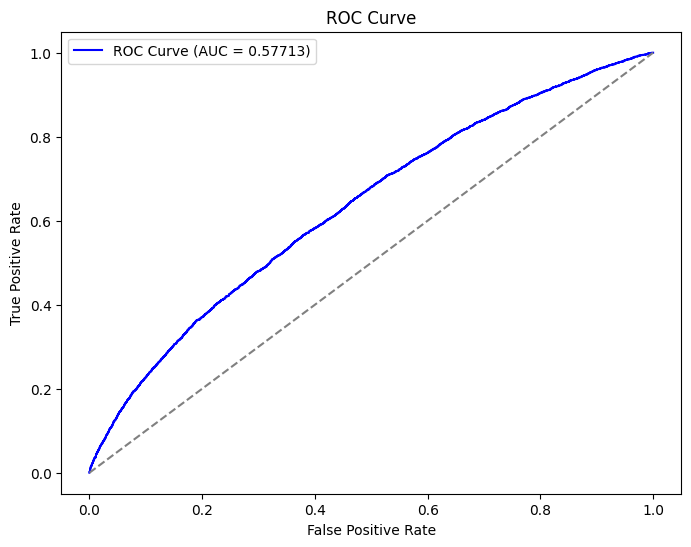

In [122]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]  # Probabilitas kelas positif
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_lr})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # Garis diagonal sebagai model random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [123]:
print("Distribusi sebelum SMOTE:\n", y_train.value_counts())
print("Distribusi setelah SMOTE:\n", pd.Series(y_train_res).value_counts())


Distribusi sebelum SMOTE:
 TARGET
0    99513
1     7464
Name: count, dtype: int64
Distribusi setelah SMOTE:
 TARGET
0    99513
1    99513
Name: count, dtype: int64


In [124]:
correlation = X_train.corrwith(y_train)
correlation = correlation.abs().sort_values(ascending=False)
print(correlation.head(10))  # Lihat 10 fitur dengan korelasi tertinggi terhadap target


EXT_SOURCE_3                   0.149504
EXT_SOURCE_2                   0.148350
DAYS_BIRTH                     0.070105
AGE                            0.070072
CODE_GENDER                    0.054868
DAYS_ID_PUBLISH                0.049993
NAME_EDUCATION_TYPE            0.048922
REGION_RATING_CLIENT_W_CITY    0.048363
REGION_RATING_CLIENT           0.046099
DAYS_LAST_PHONE_CHANGE         0.043863
dtype: float64


In [128]:
# Lakukan prediksi pada data testing
y_pred_test = logreg_model.predict(X_test_scaled)

# Konversi hasil prediksi ke dalam DataFrame
df_predictions = pd.DataFrame({'Predicted_TARGET': y_pred_test})

# Tampilkan beberapa hasil prediksi
print(df_predictions.head())

# Jika ingin menyimpan hasil prediksi ke dalam file CSV
df_predictions.to_csv('logreg_predictions.csv', index=False)
print("\nPredictions saved to 'logreg_predictions.csv'")


   Predicted_TARGET
0                 0
1                 1
2                 0
3                 0
4                 0

Predictions saved to 'logreg_predictions.csv'


##Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train_scaled, y_train_res)

# Prediksi pada data test
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]



In [134]:
# Evaluasi model
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC AUC Score (Random Forest):", round(roc_auc_rf, 5))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


ROC AUC Score (Random Forest): 0.67572

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     42649
           1       0.18      0.02      0.04      3199

    accuracy                           0.92     45848
   macro avg       0.55      0.51      0.50     45848
weighted avg       0.88      0.92      0.90     45848



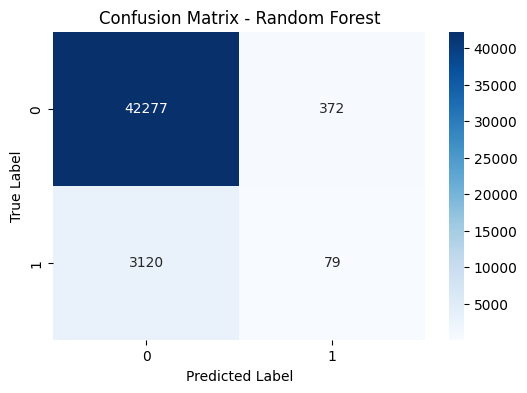

In [135]:

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


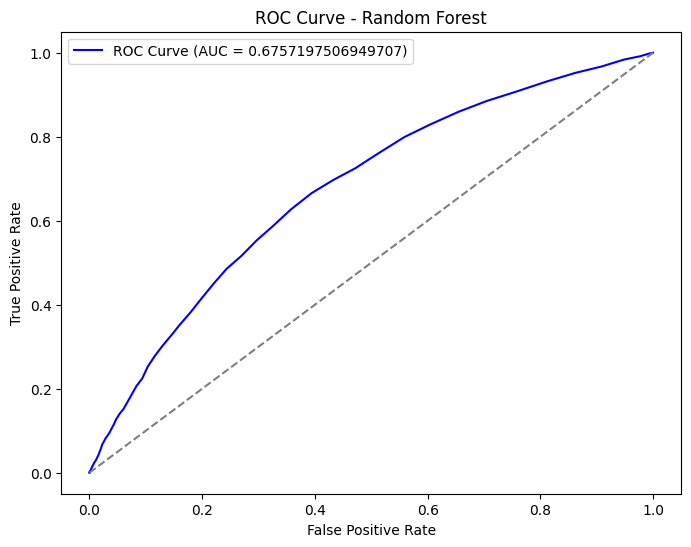

In [136]:

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_rf})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # Random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

##LightBGM

In [137]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train model
lgb_model.fit(X_train_scaled, y_train_res)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 99513, number of negative: 99513
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.749593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5572
[LightGBM] [Info] Number of data points in the train set: 199026, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(max_depth=6, random_state=42)

In [138]:
# Prediksi pada data test
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_prob_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]  # Probabilitas kelas positif

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [139]:
# Evaluasi model
roc_auc_lgb = roc_auc_score(y_test, y_prob_lgb)
print("ROC AUC Score (LightGBM):", round(roc_auc_lgb, 5))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))


ROC AUC Score (LightGBM): 0.69803

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     42649
           1       0.21      0.02      0.04      3199

    accuracy                           0.93     45848
   macro avg       0.57      0.51      0.50     45848
weighted avg       0.88      0.93      0.90     45848



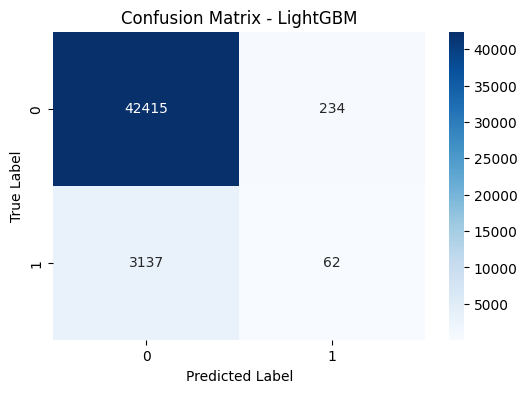

In [140]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LightGBM")
plt.show()

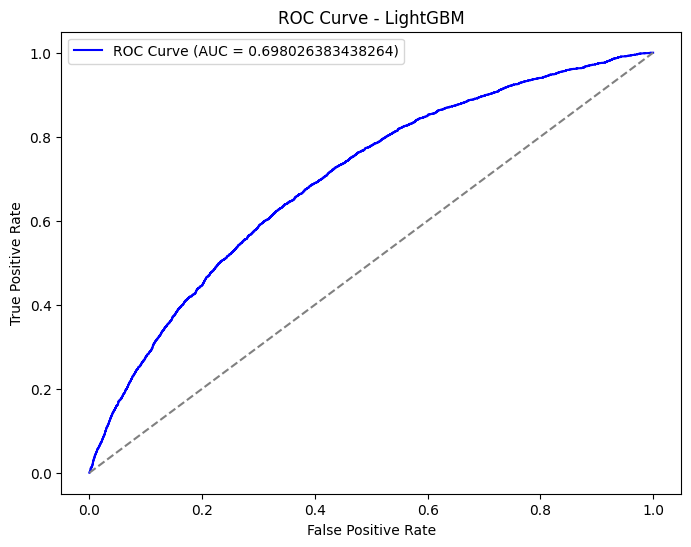

In [141]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lgb)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_lgb})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # Random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend()
plt.show()

Berdasarkan hasil pemodelan menggunakan tiga algoritma berbeda, didapatkan model terbaik yaitu LightGBM dengan akurasi 93% dan nilai ROC tertinggi yaitu 0.69. Model ini akan digunakan untuk melakukan prediksi credit score pada data test

#Prediksi Status Credit pada Data Test

In [142]:
df_test_path = "/content/drive/MyDrive/Home Credit Indonesia x Rakamin Academy/application_test.csv"

df_test = pd.read_csv(df_test_path)
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df_test.isna().sum()

,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,6049
AMT_REQ_CREDIT_BUREAU_WEEK,6049
AMT_REQ_CREDIT_BUREAU_MON,6049
AMT_REQ_CREDIT_BUREAU_QRT,6049


##Data Test Prepocessing

In [143]:
# Hapus kolom dari data_test
df_test = df_test.drop(columns=columns_to_drop)

# Tampilkan informasi dataset setelah penghapusan
print("Shape dataset setelah penghapusan:", df_test.shape)

Shape dataset setelah penghapusan: (48744, 80)


In [144]:
print(df_test['OCCUPATION_TYPE'].value_counts(dropna=False))


modus_value = df_test['OCCUPATION_TYPE'].mode()[0]
print("Modus dari OCCUPATION_TYPE:", modus_value)

OCCUPATION_TYPE
NaN                      15605
Laborers                  8655
Sales staff               5072
Core staff                4361
Managers                  3574
Drivers                   2773
High skill tech staff     1854
Accountants               1628
Medicine staff            1316
Security staff             915
Cooking staff              894
Cleaning staff             656
Private service staff      455
Low-skill Laborers         272
Secretaries                213
Waiters/barmen staff       178
Realty agents              138
HR staff                   104
IT staff                    81
Name: count, dtype: int64
Modus dari OCCUPATION_TYPE: Laborers


In [145]:
# Imputasi nilai NaN dengan modus
df_test['OCCUPATION_TYPE'] = df_test['OCCUPATION_TYPE'].fillna(modus_value)
df_test['CODE_GENDER']= df_test['CODE_GENDER'].replace('XNA', 'F')
df_test['NAME_FAMILY_STATUS']= df_test['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')



In [146]:
#membuat kolom baru AGE untuk mengelompokkan usia consumers

# calc of the day (make abs)
df_test['DAYS_BIRTH']= df_test['DAYS_BIRTH'].abs()
df_test['DAYS_EMPLOYED']= df_test['DAYS_EMPLOYED'].abs()
df_test['DAYS_REGISTRATION']= df_test['DAYS_REGISTRATION'].abs()
df_test['DAYS_ID_PUBLISH']= df_test['DAYS_ID_PUBLISH'].abs()
df_test['DAYS_LAST_PHONE_CHANGE']= df_test['DAYS_LAST_PHONE_CHANGE'].abs()

# create new column to calc consumers age
df_test['AGE']= (df_test['DAYS_BIRTH']/365).astype(int)

age_category= []
for i in df_test['AGE']:
    if i <=35:
        age_category.append('Early Adult')
    elif i <=45:
        age_category.append('Adult')
    else:
        age_category.append('Older')

In [147]:

# Buat kolom AGE_CATEGORY berdasarkan kelompok usia
df_test['AGE_CATEGORY'] = df_test['AGE'].apply(lambda x: 'Early Adult' if x <= 35
                                                     else 'Adult' if x <= 45
                                                     else 'Older')

In [149]:
num_columns= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'CNT_CHILDREN','CNT_FAM_MEMBERS',
              'EXT_SOURCE_3','EXT_SOURCE_2','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
             'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']
df_test[num_columns]= df_test[num_columns].fillna(value= df_test[num_columns].median())

In [150]:

cat_test= df_test.select_dtypes(exclude= 'number').columns.tolist()
cat_test

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'AGE_CATEGORY']

In [151]:
data_test= df_test.copy()

In [152]:
#ubah categorical column menjadi numeric

data_test[cat_test]= data_test[cat_test].apply(LabelEncoder().fit_transform)
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_CATEGORY
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,2
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,49,2
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,4.0,54,2
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,38,0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,35,1


In [157]:
data_test.dropna(inplace= True)

In [159]:
data_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_CATEGORY
0,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,2
3,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,38,0
5,0,0,1,1,0,270000.0,959688.0,34600.5,810000.0,6,...,0,0,0.0,0.0,0.0,0.0,1.0,2.0,50,2
8,0,0,0,1,0,315000.0,364896.0,28957.5,315000.0,6,...,0,0,0.0,0.0,0.0,0.0,0.0,5.0,34,1
10,0,0,0,1,0,67500.0,675000.0,25447.5,675000.0,6,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,64,2


In [160]:
X_test_new = data_test[features] #mengambil fitur dari data train

In [161]:
#normalisasi

X_test_new_scaled = scaler.transform(X_test_new)

In [163]:
#prediksi data baru dengan model LightGBM

y_pred_test = lgb_model.predict(X_test_new_scaled)
y_prob_test = lgb_model.predict_proba(X_test_new_scaled)[:, 1]  # Probabilitas kelas positif

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [164]:
data_test['Predicted_Target'] = y_pred_test
data_test['Predicted_Probability'] = y_prob_test


In [167]:
data_test.head(50)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_CATEGORY,Predicted_Target,Predicted_Probability
0,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,52,2,0,0.227499
3,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,...,0.0,0.0,0.0,0.0,0.0,3.0,38,0,0,0.178198
5,0,0,1,1,0,270000.0,959688.0,34600.5,810000.0,6,...,0.0,0.0,0.0,0.0,1.0,2.0,50,2,0,0.154453
8,0,0,0,1,0,315000.0,364896.0,28957.5,315000.0,6,...,0.0,0.0,0.0,0.0,0.0,5.0,34,1,0,0.152832
10,0,0,0,1,0,67500.0,675000.0,25447.5,675000.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,64,2,0,0.232723
15,0,1,1,1,0,180000.0,296280.0,21690.0,225000.0,6,...,0.0,0.0,0.0,0.0,1.0,3.0,37,0,0,0.482679
18,0,0,1,1,1,225000.0,431280.0,23526.0,360000.0,6,...,0.0,0.0,0.0,0.0,3.0,4.0,30,1,0,0.085279
20,0,0,0,1,0,99000.0,225000.0,19242.0,225000.0,6,...,0.0,0.0,0.0,0.0,1.0,2.0,28,1,0,0.048151
21,0,0,0,1,0,157500.0,266652.0,16443.0,202500.0,6,...,0.0,0.0,0.0,0.0,0.0,4.0,61,2,0,0.086993
22,0,0,0,1,0,135000.0,540000.0,27702.0,540000.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,62,2,0,0.330915


<ipython-input-169-aa5f9cc658a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_test['Predicted_Target'], palette='viridis')


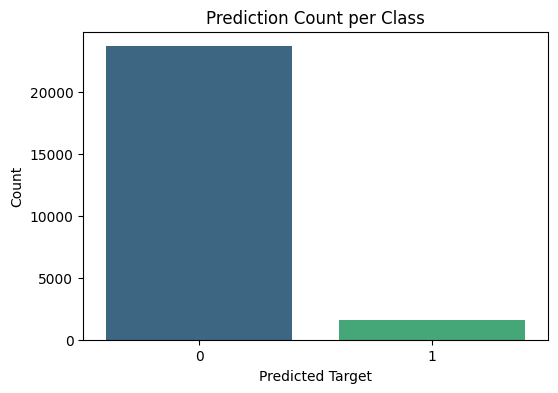

In [169]:

plt.figure(figsize=(6, 4))
sns.countplot(x=data_test['Predicted_Target'], palette='viridis')
plt.xlabel('Predicted Target')
plt.ylabel('Count')
plt.title('Prediction Count per Class')
plt.show()

In [166]:
#simpan hasil prediksi ke dalam csv

data_test.to_csv('hasil_prediksi.csv', index=False)
